# Curve fitting for the water saturation and relative permeability data

In [ ]:
using Plots
using CSV
using DataFrames
using LsqFit
using LaTeXStrings

In [3]:
LW1 = 2.5;
LCoil = :darkred;
LCwater = :blue;
# Plotting befor and after together
figpath = "D:/USN/Asis/MS_Thesis/USN-MSc-Lyx-Template/fig/"

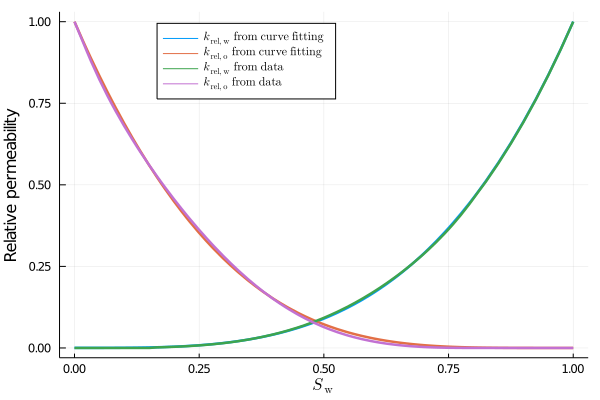

In [4]:
using CSV
using DataFrames
using LsqFit
df1 = CSV.read("export_df1.csv",DataFrame);
@. model(x, p) = x^p[1] + p[2] 
p01 = [1.,1.] 
sw = df1.Sw;
Y1 = df1.Krw
result = curve_fit(model,sw,Y1,p01)
p1 = coef(result) 

@. model(y, p) = (1 - y)^p[1] * (1 - y^p[2]); 
p02 = [1.,1.] 
Y2 = df1.Kro
result = curve_fit(model,sw,Y2,p02)
p2 = coef(result)

n = length(sw);
kw_nor = zeros(Float64,n,1);
ko_nor = zeros(Float64,n,1);

fit1 = p1[1];
fit2 = p1[2];
fit3 = p2[1];
fit4 = p2[2];
kw_nor[:] .= sw[:].^fit1 .+ fit2  ;
ko_nor[:] .= (1 .-sw[:]).^fit3 .* (1 .-sw[:].^fit4);
perm_w = df1.Krw;
perm_o = df1.Kro;
plot(sw,kw_nor,lw=LW1,xlabel = L"S_\mathrm{\mathrm{w}}",ylabel="Relative permeability",legend =:top,
    label= L"k_\mathrm{rel,w}\ \mathrm{from\ curve\ fitting}")
plot!(sw,ko_nor,lw=LW1,label=L"k_\mathrm{rel,o}\ \mathrm{from\ curve\ fitting}")
plot!(sw,perm_w,lw=LW1,label=L"k_\mathrm{rel,w}\ \mathrm{from\ data}")
plot!(sw,perm_o,lw=LW1,label=L"k_\mathrm{rel,o}\ \mathrm{from\ data}")

In [5]:

figfile = "CurveFitting.svg"
savefig(figpath*figfile)